# LAT Data Latency History

#### Including trending of outliers: long-timescales

In [1]:
from astropy.table import Table, Column
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import (WEEKLY, MONTHLY, YEARLY, DateFormatter, rrulewrapper, RRuleLocator, drange)
import datetime as dt
#from datetime import datetime
plt.rc('font', size = 10)
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

/Users/rac/anaconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# read regular ASCII tabular files of data

file = "/Users/rac/Documents/GLAST/ISOC/LATmetrics/latency/datetimes.20200405"
f = Table.read(file, format = 'ascii')
ymd = f['YMD']
hms = f['HMS']
fy = f['FYear'] # - 2000
slact = f['SLAC']
nasat = f['NASA']
tott = f['TOTAL']
delt = f['DELTAT']
dnt = [dt.datetime.strptime(ymd[i]+hms[i],"%Y-%m-%d%H:%M:%S") for i in range(len(ymd))]
#(fy, dnt)

<IPython.core.display.Javascript object>


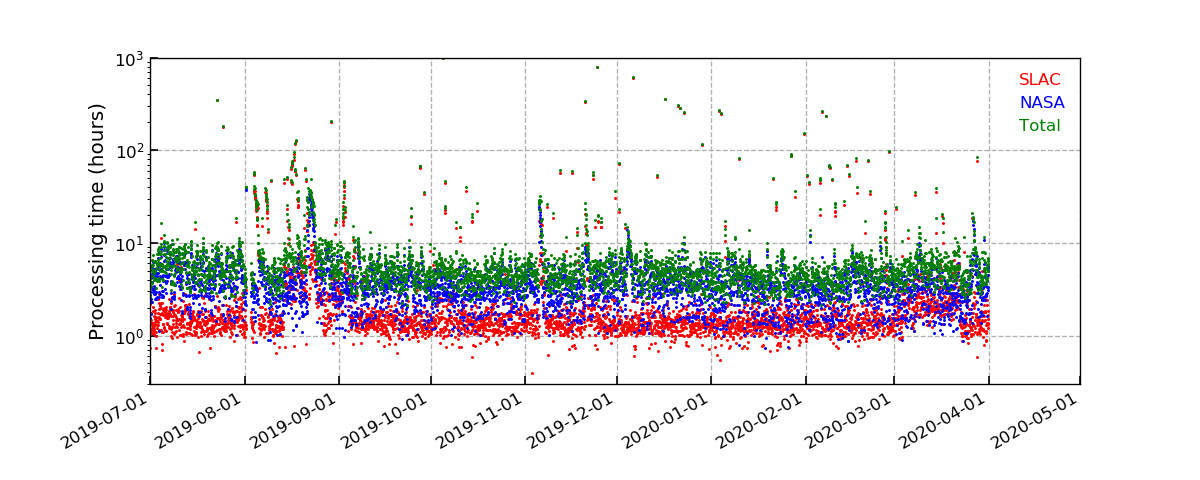

In [25]:
# time history plot of latencies

def color_legend_texts(leg):
    """Color legend texts based on color of corresponding lines"""
    for line, txt in zip(leg.get_lines(), leg.get_texts()):
        txt.set_color(line.get_color())  

fig = plt.figure(figsize = [10,4])
ax = fig.add_subplot(111)
ax.set_xlim([dt.date(2019, 7, 1), dt.date(2020, 5, 1)])
ax.set_ylim(.3,1000)
locator = mdates.AutoDateLocator(minticks=3, maxticks=12)
#ax.xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))

ax.plot(dnt, slact, '.',color='r',label='SLAC',markersize=1.6)
ax.plot(dnt, nasat, '.', color='b',label='NASA',markersize=1.6)
ax.plot(dnt, tott, '.',color='g',label='Total',markersize=1.6)
plt.ylabel("Processing time (hours)",fontsize='large')
#plt.title("LAT Run Latency Time History")
plt.yscale('log')
plt.gcf().autofmt_xdate()
legend = ax.legend(loc='upper right', fontsize = 'medium',markerscale = 0,frameon = 0)
color_legend_texts(legend)

ax.tick_params(which='major', length=5, width=1, direction='in')
ax.grid(True, linestyle='--')

plt.show()

<IPython.core.display.Javascript object>


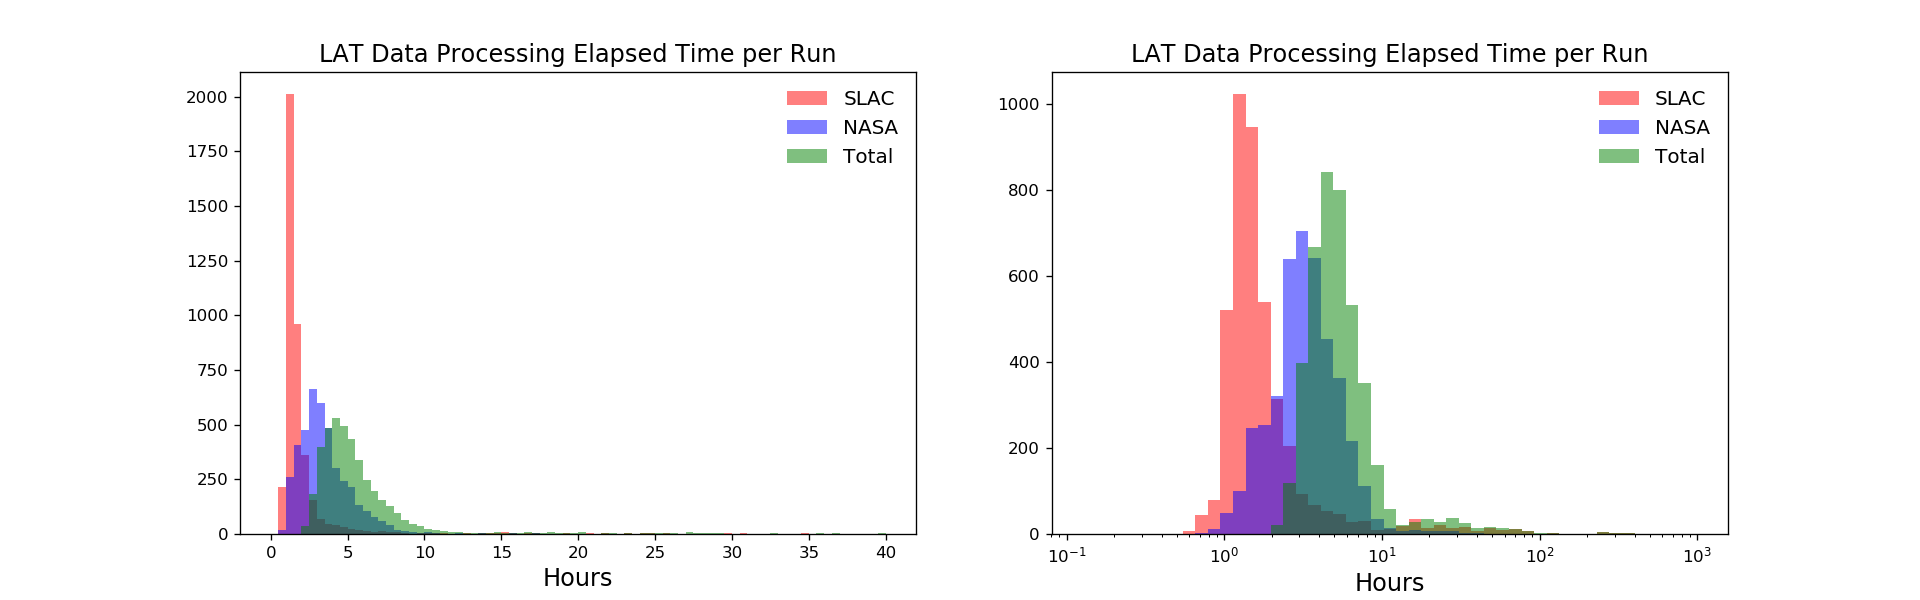

In [4]:
# extract the data to be used in the latency histograms
ok = (fy > 2019.5)

qslact = slact[ok]
qnasat = nasat[ok]
qtott = tott[ok]

###########################

fig, (ax1, ax2) = plt.subplots(1,2, figsize = [16,5])

# first histogram using linear time bins
#minorLocator1 = AutoMinorLocator(10)
#ax1.yaxis.set_minor_locator(minorLocator1)
ax1.hist(qslact,color='r',label='SLAC',range = (0,40),bins=80,alpha=0.5)
ax1.hist(qnasat, color='b',label='NASA',range = (0,40),bins=80,alpha=0.5)
ax1.hist(qtott,color='g',label='Total',range = (0,40),bins=80,alpha=0.5)
ax1.set_xlabel("Hours",fontsize='x-large')
ax1.set_title("LAT Data Processing Elapsed Time per Run",fontsize='x-large')
legend = ax1.legend(loc='upper right', fontsize='large', markerscale = 0.1,frameon = 0)

# first histogram using log time bins
binarr = 10**(np.linspace(-30,100)*0.03)
ax2.hist(qslact,color='r',label='SLAC',bins=binarr,alpha=0.5)
ax2.hist(qnasat, color='b',label='NASA',bins=binarr,alpha=0.5)
ax2.hist(qtott,color='g',label='Total',bins=binarr,alpha=0.5)
plt.xlabel("Hours",fontsize='x-large')
ax2.set_title("LAT Data Processing Elapsed Time per Run",fontsize='x-large')
plt.xscale('log')
legend = ax2.legend(loc='upper right', fontsize='large',frameon = 0)
plt.show()

In [5]:
%%script false   # this line removes this section from the notebook
#majorLocator = MultipleLocator(1)
#majorFormatter = FormatStrFormatter('%d')
minorLocator = AutoMinorLocator(12)

def color_legend_texts(leg):
    """Color legend texts based on color of corresponding lines"""
    for line, txt in zip(leg.get_lines(), leg.get_texts()):
        txt.set_color(line.get_color())  

fig = plt.figure(figsize = [16,5])
ax = fig.add_subplot(111)
ax.set_xlim(2019,2020)
ax.set_ylim(.3,1000)
#ax.xaxis.set_major_locator(majorLocator)
#ax.xaxis.set_minor_locator(minorLocator)
locator = mdates.AutoDateLocator(minticks=3, maxticks=7)
ax.xaxis.set_major_locator(locator)
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))

ax.plot(fy, slact, '.',color='r',label='SLAC',markersize=1.6)
ax.plot(fy, nasat, '.', color='b',label='NASA',markersize=1.6)
ax.plot(fy, tott, '.',color='g',label='Total',markersize=1.6)
#ax.minorticks_on()
plt.ylabel("Processing time (hours)",fontsize='x-large')
plt.title("LAT Run Latency Time History")
plt.yscale('log')
plt.gcf().autofmt_xdate()
legend = ax.legend(loc='upper right', fontsize='x-large', markerscale = 0,frameon = 0)
color_legend_texts(legend)

plt.show()

<IPython.core.display.Javascript object>


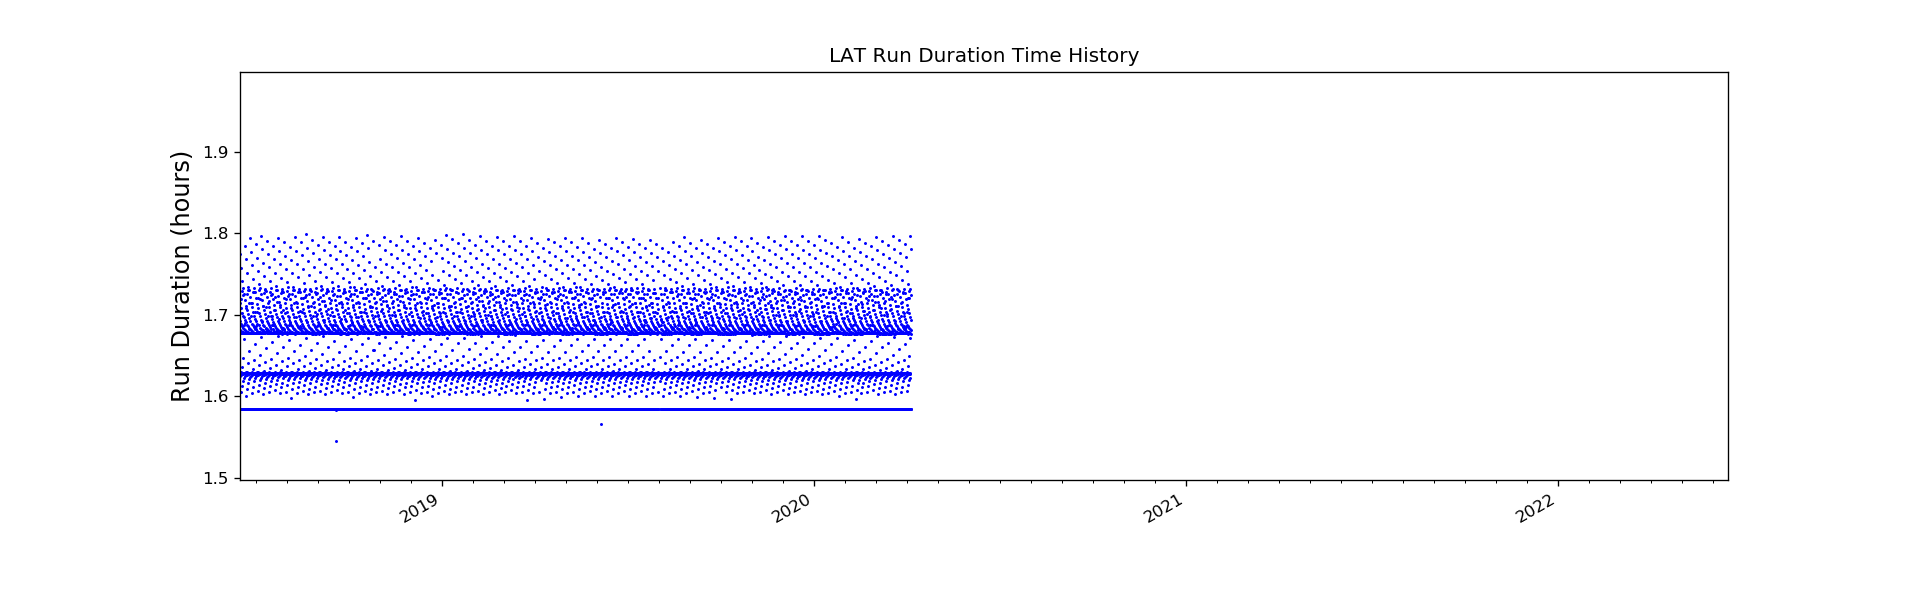

In [6]:
majorLocator = MultipleLocator(1)
#majorFormatter = FormatStrFormatter('%d')
minorLocator = AutoMinorLocator(12)

def color_legend_texts(leg):
    """Color legend texts based on color of corresponding lines"""
    for line, txt in zip(leg.get_lines(), leg.get_texts()):
        txt.set_color(line.get_color())  

fig = plt.figure(figsize = [16,5])
ax = fig.add_subplot(111)
ax.set_xlim(2017,2021)
ax.set_ylim(1.5,2)
ax.xaxis.set_major_locator(majorLocator)
ax.xaxis.set_minor_locator(minorLocator)
ax.plot(fy, delt, '.',color='b',label='Delta T',markersize=1.6)
#ax.minorticks_on()
plt.ylabel("Run Duration (hours)",fontsize='x-large')
plt.title("LAT Run Duration Time History")
plt.gcf().autofmt_xdate()
#legend = ax.legend(loc='upper right', fontsize='x-large', markerscale = 0,frameon = 0)
#color_legend_texts(legend)

plt.show()

In [7]:
%%script false   # this line removes this section from the notebook
file = "/Users/rac/Documents/GLAST/ISOC/LATmetrics/latency/2016/sm1000.slac.20161026"
f = Table.read(file, format = 'ascii')
ysm = f['col1'] - 2000
p0  = f['col2']
p5  = f['col3']
p50 = f['col4']
p95 = f['col5']
p98 = f['col6']
p99 = f['col7']
p100 = f['col8']

In [8]:
%%script false   # this line removes this section from the notebook
fig = plt.figure(figsize = [10, 3])
ax = fig.add_subplot(111)
ax.set_xlim(2008,2020)
ax.plot(fy, tott, ',')
plt.xlabel("Year")
plt.ylabel("Proc time (hours)")
plt.title("Latency time history")
plt.yscale('log')
#ax.plot(ysm,p50,'-r')
#ax.plot(ysm,p5,'-r')
#ax.plot(ysm,p95,'-r')
#ax.plot(ysm,p98,'-g')
#ax.plot(ysm,p99,'-v')
plt.gcf().autofmt_xdate()
plt.show()

In [9]:
# specify the time range for the histograms and time-history plot of LAT data processing latency

startYMD = (2019,7,1)
endYMD = (2020,4,1)
#
ylen = float(format(dt.datetime(startYMD[0],12,31), '%j'))
doy = float(format(dt.datetime(startYMD[0],startYMD[1],startYMD[2]), '%j'))-1
startFY = startYMD[0]+doy/ylen
ylen = float(format(dt.datetime(endYMD[0],12,31), '%j'))
doy = float(format(dt.datetime(endYMD[0],endYMD[1],endYMD[2]), '%j'))-1
endFY = endYMD[0]+doy/ylen
(startFY,endFY)

(2019.495890410959, 2020.2486338797814)

In [10]:
# extract the data to be used in the time history plot
ok = (fy > startFY)

qymd = ymd[ok]
qhms = hms[ok]
qslact = slact[ok]
qnasat = nasat[ok]
qtott = tott[ok]
qdelt = delt[ok]
qfy = fy[ok]
qdnt = [dt.datetime.strptime(qymd[i]+qhms[i],"%Y-%m-%d%H:%M:%S") for i in range(len(qymd))]

In [11]:
# specify the time range for the histograms and time-history plot of LAT data processing latency

start = "2018-01-01 00:00:00"
end = "2018-04-01 00:00:00"
dnt0 = dt.datetime.strptime(start,"%Y-%m-%d %H:%M:%S")
dnt1 = dt.datetime.strptime(end,"%Y-%m-%d %H:%M:%S")

<IPython.core.display.Javascript object>


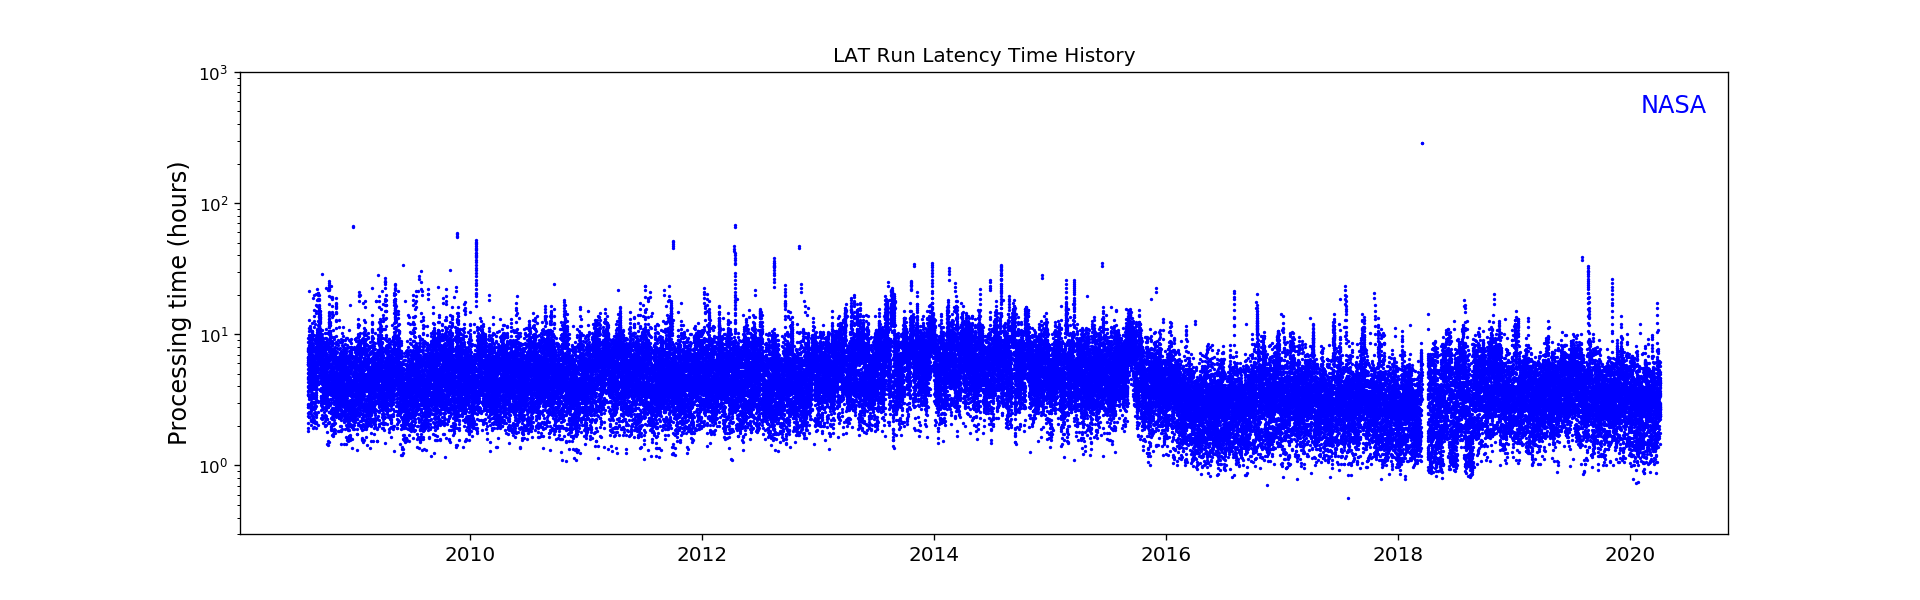

In [12]:
def color_legend_texts(leg):
    """Color legend texts based on color of corresponding lines"""
    for line, txt in zip(leg.get_lines(), leg.get_texts()):
        txt.set_color(line.get_color())  

fig, ax = plt.subplots(figsize = [16,5])

ax = plt.gca() # get the current axes
ax.set_ylim(.3,1000)
#ax.plot_date(dnt, slact, '.',color='r',label='SLAC',markersize=2)
ax.plot_date(dnt, nasat, '.', color='b',label='NASA',markersize=2)
#ax.plot_date(dnt, tott, '.',color='g',label='Total',markersize=2)
plt.ylabel("Processing time (hours)",fontsize='x-large')
plt.title("LAT Run Latency Time History")
plt.yscale('log')

xax = ax.get_xaxis() # get the x-axis
adf = xax.get_major_formatter() # the auto-formatter
plt.setp( ax.xaxis.get_majorticklabels(), rotation=0,fontsize='large' )

legend = ax.legend(loc='upper right', fontsize='x-large', markerscale = 0,frameon = 0)
color_legend_texts(legend)

adf.scaled[1./24] = '%H:%M:%S'  # set the < 1day x-axis scale to H:M
adf.scaled[1.0] = '%Y-%m-%d' # set the > 1day < 1m x-axis scale to Y-m-d
adf.scaled[30.] = '%Y-%m-%d' # set the > 1month < 1Y x-axis scale to Y-m
adf.scaled[365.] = '%Y' # set the > 1year x-axis scale to Y

plt.draw()

<IPython.core.display.Javascript object>


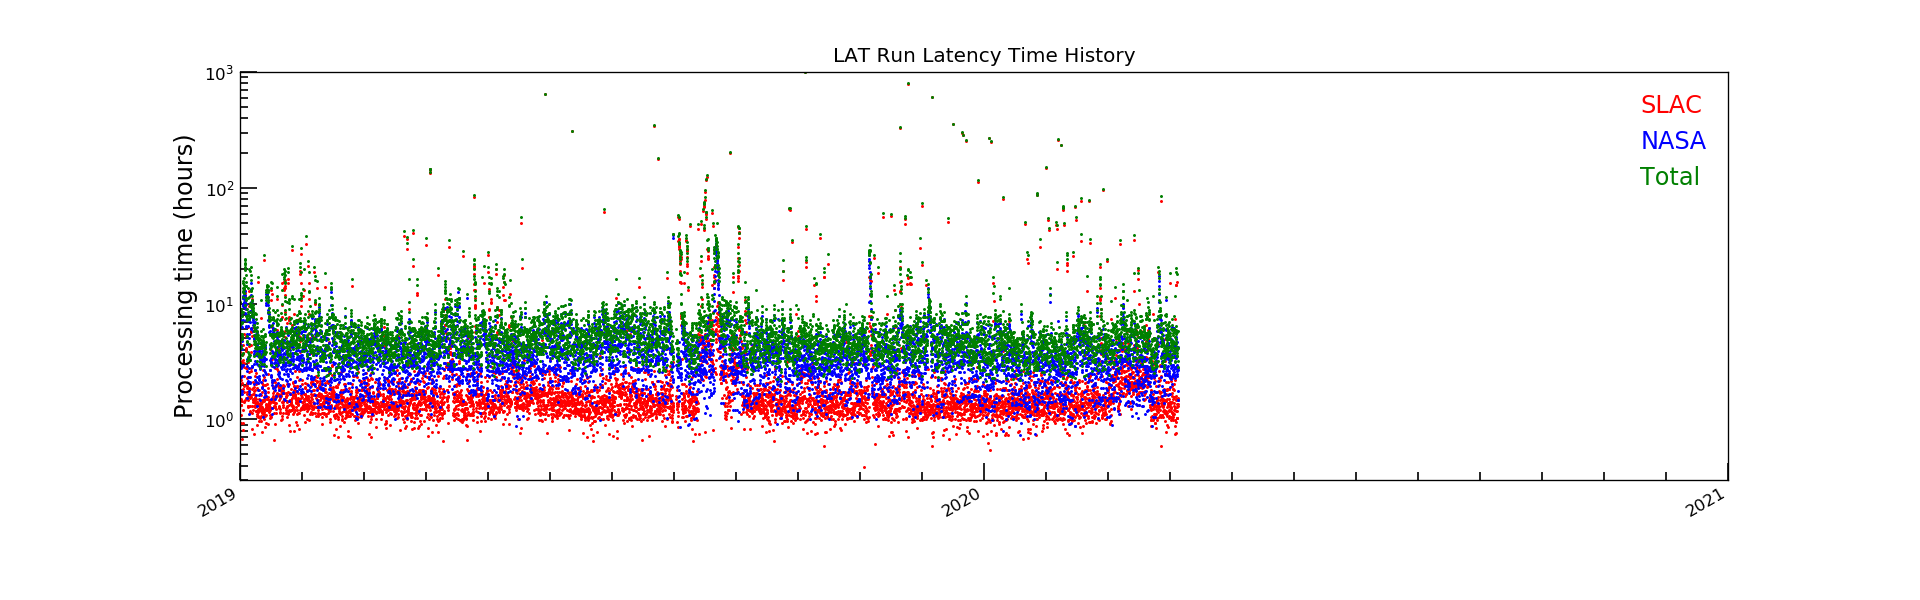

In [13]:
majorLocator = MultipleLocator(1)
#majorFormatter = FormatStrFormatter('%d')
minorLocator = AutoMinorLocator(12)

def color_legend_texts(leg):
    """Color legend texts based on color of corresponding lines"""
    for line, txt in zip(leg.get_lines(), leg.get_texts()):
        txt.set_color(line.get_color())  

fig = plt.figure(figsize = [16,5])
ax = fig.add_subplot(111)
ax.set_xlim(2019,2021)
ax.set_ylim(.3,1000)
ax.xaxis.set_major_locator(majorLocator)
ax.xaxis.set_minor_locator(minorLocator)
ax.plot(fy, slact, '.',color='r',label='SLAC',markersize=1.6)
ax.plot(fy, nasat, '.', color='b',label='NASA',markersize=1.6)
ax.plot(fy, tott, '.',color='g',label='Total',markersize=1.6)
#ax.minorticks_on()
#plt.xlabel("Year",fontsize='medium')
plt.ylabel("Processing time (hours)",fontsize='x-large')
plt.title("LAT Run Latency Time History")
plt.yscale('log')
plt.gcf().autofmt_xdate()
legend = ax.legend(loc='upper right', fontsize='x-large', markerscale = 0,frameon = 0)
color_legend_texts(legend)

ax.tick_params(which='major', length=10, width=1, direction='in')
ax.tick_params(which='minor', length=5, width=1, direction='in')

plt.show()

In [14]:
# extract the data to be used in the histograms
ok = (fy < endFY)

ymd = ymd[ok]
hms = hms[ok]
slact = slact[ok]
nasat = nasat[ok]
tott = tott[ok]
fy = fy[ok]
dnt = [dt.datetime.strptime(ymd[i]+hms[i],"%Y-%m-%d%H:%M:%S") for i in range(len(ymd))]

<IPython.core.display.Javascript object>


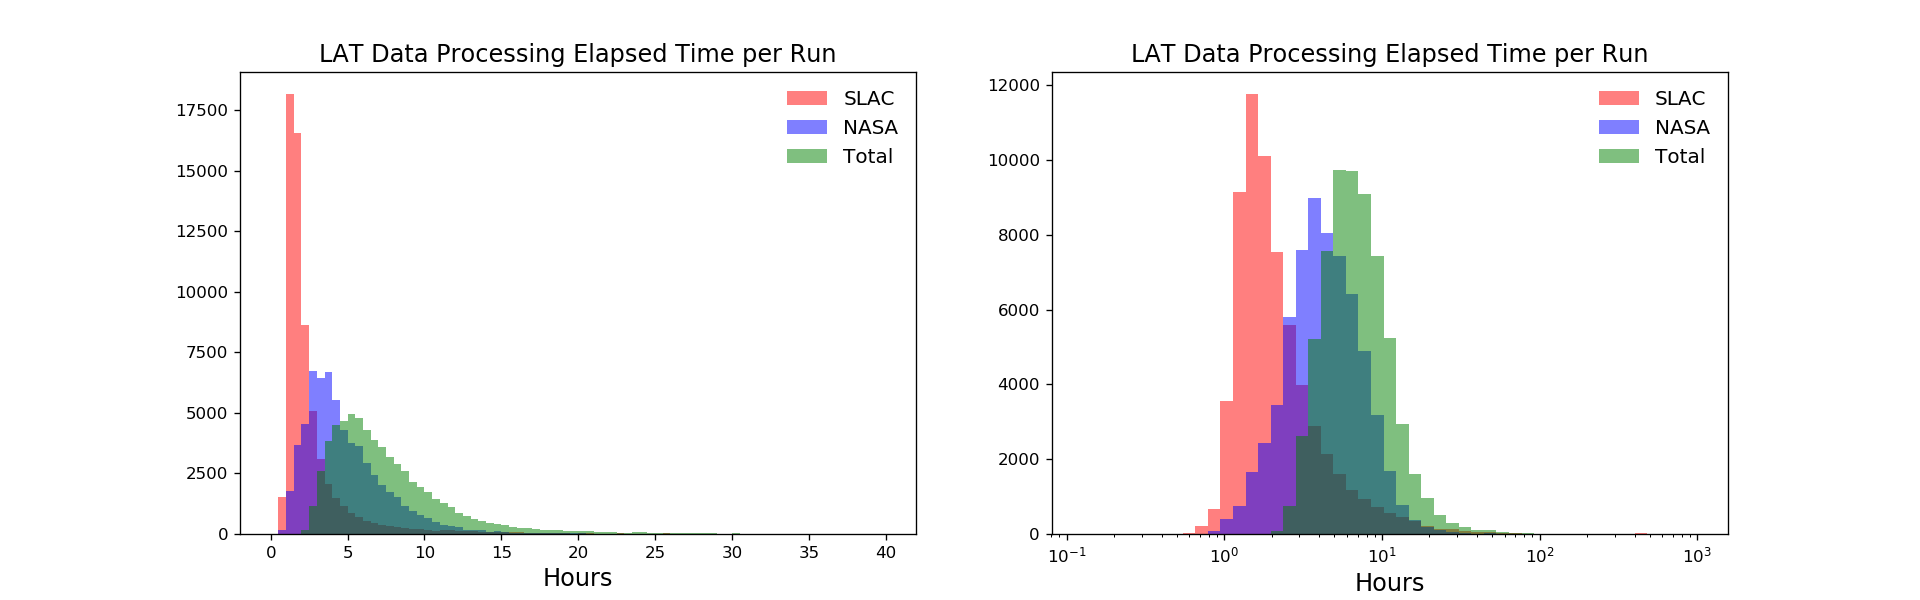

In [15]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = [16,5])

# first histogram using linear time bins
#minorLocator1 = AutoMinorLocator(10)
#ax1.yaxis.set_minor_locator(minorLocator1)
ax1.hist(slact,color='r',label='SLAC',range = (0,40),bins=80,alpha=0.5)
ax1.hist(nasat, color='b',label='NASA',range = (0,40),bins=80,alpha=0.5)
ax1.hist(tott,color='g',label='Total',range = (0,40),bins=80,alpha=0.5)
ax1.set_xlabel("Hours",fontsize='x-large')
ax1.set_title("LAT Data Processing Elapsed Time per Run",fontsize='x-large')
legend = ax1.legend(loc='upper right', fontsize='large', markerscale = 0.1,frameon = 0)

# first histogram using log time bins
binarr = 10**(np.linspace(-30,100)*0.03)
ax2.hist(slact,color='r',label='SLAC',bins=binarr,alpha=0.5)
ax2.hist(nasat, color='b',label='NASA',bins=binarr,alpha=0.5)
ax2.hist(tott,color='g',label='Total',bins=binarr,alpha=0.5)
plt.xlabel("Hours",fontsize='x-large')
ax2.set_title("LAT Data Processing Elapsed Time per Run",fontsize='x-large')
plt.xscale('log')
legend = ax2.legend(loc='upper right', fontsize='large',frameon = 0)
plt.show()